# settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('tr_train.csv')
target = pd.read_csv('cust_train.csv')

In [3]:
# 기초적인 정보 확인
print(df.shape) # 행, 열의 개수
print()
print(df.columns) # 열 이름
print()
df.info() # 대략적인 정보 확인

(3415963, 21)

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_ADD_NM', 'PD_BRA_NM',
       'PD_BUY_AM', 'PD_BUY_CT', 'SESS_SEQ', 'SESS_DT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'KWD_NM',
       'SEARCH_CNT', 'PD_NM', 'CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415963 entries, 0 to 3415962
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CLNT_ID          int64  
 1   SESS_ID          int64  
 2   HITS_SEQ         int64  
 3   PD_C             int64  
 4   PD_ADD_NM        object 
 5   PD_BRA_NM        object 
 6   PD_BUY_AM        object 
 7   PD_BUY_CT        object 
 8   SESS_SEQ         int64  
 9   SESS_DT          int64  
 10  TOT_PAG_VIEW_CT  float64
 11  TOT_SESS_HR_V    object 
 12  DVC_CTG_NM       object 
 13  ZON_NM           object 
 14  CITY_NM          object 
 15  KWD_NM           object 
 16  SEARCH_CNT       i

In [4]:
# 결측치 확인
df.isna().sum()

CLNT_ID            0
SESS_ID            0
HITS_SEQ           0
PD_C               0
PD_ADD_NM          0
PD_BRA_NM          0
PD_BUY_AM          0
PD_BUY_CT          0
SESS_SEQ           0
SESS_DT            0
TOT_PAG_VIEW_CT    0
TOT_SESS_HR_V      0
DVC_CTG_NM         0
ZON_NM             0
CITY_NM            0
KWD_NM             0
SEARCH_CNT         0
PD_NM              0
CLAC1_NM           0
CLAC2_NM           0
CLAC3_NM           0
dtype: int64

In [5]:
# head 확인
df.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,...,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,KWD_NM,SEARCH_CNT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,128408,8274151,356,283756,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),"42,500",1,19,20180515,...,"4,658",mobile,Seoul,Seoul,여아신발,1,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
1,128408,8274151,356,283756,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),"42,500",1,19,20180515,...,"4,658",mobile,Seoul,Seoul,아디다스키즈,1,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
2,128408,8274151,356,283756,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),"42,500",1,19,20180515,...,"4,658",mobile,Seoul,Seoul,아디다스 바람막이,1,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
3,128408,8274151,356,283756,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),"42,500",1,19,20180515,...,"4,658",mobile,Seoul,Seoul,신발,1,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
4,128408,8274151,356,283756,모델:선택02.CQ2332|사이즈:240 / 1개,아디다스(퍼포먼스),"42,500",1,19,20180515,...,"4,658",mobile,Seoul,Seoul,여아신발,1,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화


# Feature engineering & extraction

# 1. Numeric features
특히, 연속형 변수에 대해서 다룬다.

### 1.1. 횟수(count)가 의미가 있는가?

A를 20번 들은 사람 P, A를 10번 들은 사람 Q, 이것이 A에 대한 P의 선호도가 Q의 2배라고 단정지을 수 있는가?

횟수 문제는 주로 **누적합 피처**인 경우에 발생한다.

이러한 경우, 해당 피처를 특정 구간으로 나누는 변환이 필요하다. 이를 비닝(binning) 이라고 한다.

즉, 해당 피처를 범주형 피처(categorical feature)로 바꿔주어야 한다.

비닝에는 양자수 비닝, 분위수 비닝 등이 있다.

`요약 : 데이터의 스케일(분포)를 확인한 뒤, 적절하게 변형해야 한다.`

In [6]:
# CLNT_ID별 TOT_PAG_VIEW_CT 합
df_clnt_page_sum = df.groupby('CLNT_ID')['TOT_PAG_VIEW_CT'].sum()

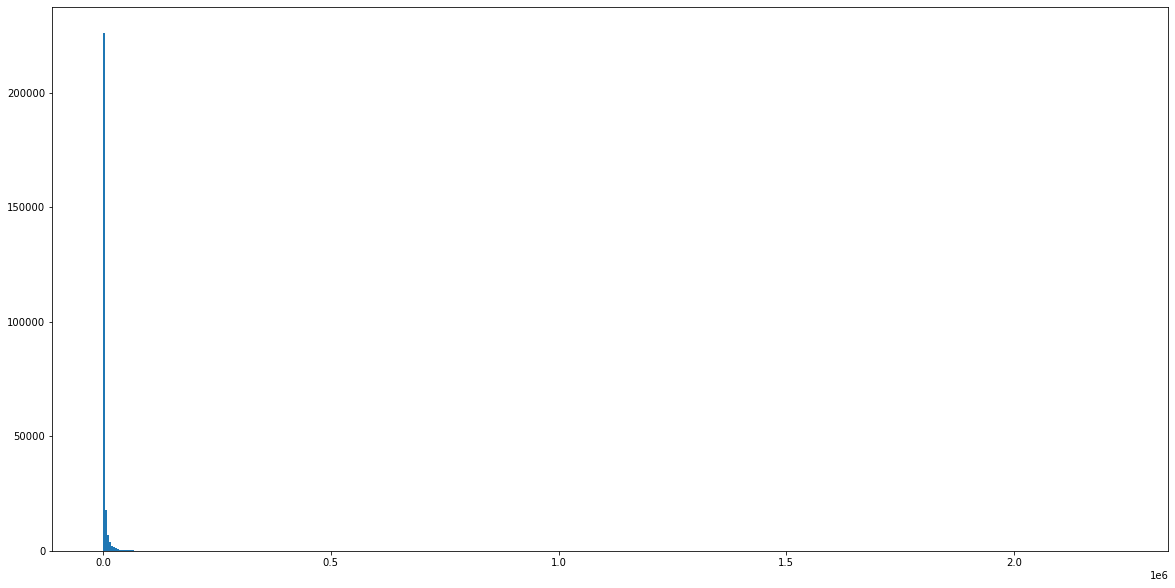

In [7]:
# 분포 확인
plt.figure(figsize = (20, 10))
plt.hist(df_clnt_page_sum, bins = 500)
plt.show()

In [8]:
# 분위수 계산
page_quantile = df_clnt_page_sum.quantile([i for i in np.arange(0.1, 1.0, 0.1)]) ; page_quantile

0.1      74.0
0.2     134.0
0.3     217.0
0.4     342.0
0.5     540.0
0.6     876.0
0.7    1497.0
0.8    2816.0
0.9    6510.0
Name: TOT_PAG_VIEW_CT, dtype: float64

In [9]:
# 분위수 기준으로 categorical feature 생성
f = pd.qcut(df_clnt_page_sum, 10, labels = False) ; f

CLNT_ID
0         1
1         7
2         8
3         5
4         3
         ..
263099    9
263100    2
263101    3
263102    8
263103    9
Name: TOT_PAG_VIEW_CT, Length: 263104, dtype: int64

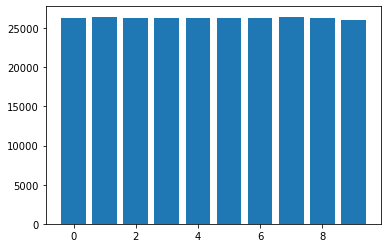

In [10]:
# 분위수로 분류했기 때문에, 거의 유사하게 분류된 것을 확인할 수 있다.
plt.bar(f.unique(), f.value_counts())
plt.show()

### 1.2. 피처의 스케일을 조절할 필요가 있는가?

특정 모델(선형회귀, 로지스틱 회귀, 딥러닝 등)의 경우 입력하는 피처의 범위에 영향을 받는다.

이를 위해 정규화(normalization), 표준화(standardization) 등의 기법이 동원된다.

이를 피처 스케일링이라고 한다.

피처 스케일링은 입력 피처들의 스케일이 서로 다른 상황에서 유용하다.

피처 스케일링은 피처의 분포를 변화시키지 않는다.

#### 1.2.1. 정규화(normalization)
정규화는 데이터를 0~1 사이의 값으로 압축시키거나 확장시킨다. (값의 범위를 동등하게 맞춘다.)

정규화는 `min max scaling`이라고도 불린다.

$$ x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}} $$



In [11]:
# 먼저 Scaler를 불러온다.
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [12]:
# scaling을 원하는 DataFrame을 입력한다.

# 여기서는 위에서 만든 feature를 써보자.
df_clnt_page_sum

CLNT_ID
0           118.0
1          2045.0
2          2906.0
3           744.0
4           340.0
           ...   
263099    30688.0
263100      208.0
263101      312.0
263102     2820.0
263103    14997.0
Name: TOT_PAG_VIEW_CT, Length: 263104, dtype: float64

In [13]:
# fit을 사용하면, 각 column에서의 min, max값을 찾아서 scaler에 저장한다.
mms.fit(df_clnt_page_sum)

ValueError: Expected 2D array, got 1D array instead:
array=[  118.  2045.  2906. ...   312.  2820. 14997.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
# 이후, transform을 통해 데이터를 변경할 수 있다.
mms.transform(df_clnt_page_sum)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
# fit_transform을 사용하면 상기한 과정을 한번에 처리한다.
# 다만, 원본 데이터는 바뀌지 않으므로 값을 따로 저장해준다.
df_scaled_clnt_page_sum = mms.fit_transform(pd.DataFrame(df_clnt_page_sum))

In [16]:
# 이렇게 나온 결과는 array 형태이다.
df_scaled_clnt_page_sum

array([[5.16135518e-05],
       [9.16477155e-04],
       [1.30290557e-03],
       ...,
       [1.38683370e-04],
       [1.26430761e-03],
       [6.72950953e-03]])

#### 1.2.2. 표준화(standardization)
표준화는 모든 features의 분산을 스케일링해준다. (분산을 동등하게 맞춘다.)

$$ x_{new} = \frac{x - \mu}{\sigma} $$

In [17]:
# 먼저 Scaler를 불러온다.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [18]:
# scaling을 원하는 DataFrame을 입력한다.
df_scaled_clnt_page_sum

array([[5.16135518e-05],
       [9.16477155e-04],
       [1.30290557e-03],
       ...,
       [1.38683370e-04],
       [1.26430761e-03],
       [6.72950953e-03]])

In [19]:
# fit_transform을 사용하면 해당 data에 맞춰서 (DataFrame인 경우 각 column별로) 알아서 scaling을 해준다.
# 다만, 원본 데이터는 바뀌지 않으므로 값을 따로 저장해준다.
temp = ss.fit_transform(pd.DataFrame(df_scaled_clnt_page_sum))

In [20]:
# 이렇게 나온 결과는 array 형태이다.
temp

array([[-2.75430884e-01],
       [-7.81540390e-02],
       [ 9.99093434e-03],
       ...,
       [-2.55570112e-01],
       [ 1.18667452e-03],
       [ 1.24780844e+00]])

- scaling을 할 때 간과하기 쉬운 사실은, train_data로 scaler를 fit해주고, **fit된 scaler를 이용해 test_data도 scaling을 해줘야 한다는 점**이다.
- test_data까지 scaler에 들어가버리면, data leakage가 발생하게 되어 모델의 성능이 나빠진다!

### 1.3. 피처의 분포를 조절할 필요가 있는가? 

특정 모델(선형회귀 등)의 경우 입력하는 피처의 분포가 정규분포임을 가정한다.

하지만 모든 피처가 정규분포일 리는 없다.

특히 누적합 등의 피처는 꼬리분포인 경우가 많다.(왜도가 큼)

이러한 경우, 로그변환, 거듭제곱변환 등을 통해 정규분포스럽게 바꿔줘야 한다.

In [21]:
# PD_BUY_AM 열이 object로 되어있기 때문에 숫자로 바꿔준다.
df['PD_BUY_AM'] = df['PD_BUY_AM'].str.replace(',','').astype('int')

# CLNT_IT별 총구매금액
df_clnt_buy_sum = df.groupby('CLNT_ID')['PD_BUY_AM'].sum()

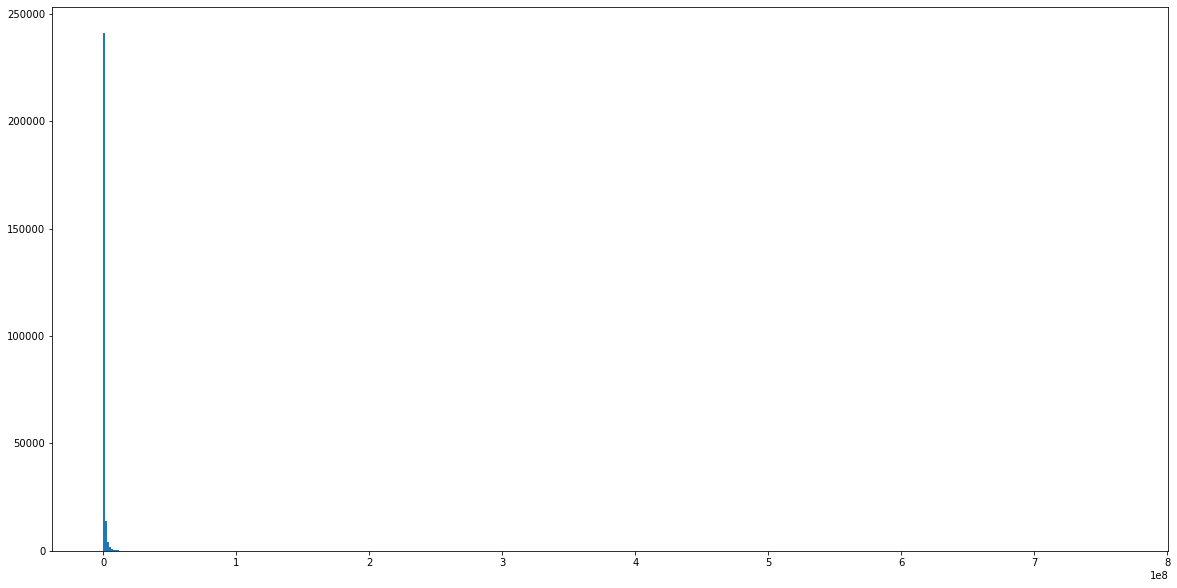

In [22]:
plt.figure(figsize = (20, 10))
plt.hist(df_clnt_buy_sum, bins = 500)
plt.show()

In [23]:
# 로그변환
df_clnt_buy_sum = np.log1p(df_clnt_buy_sum)

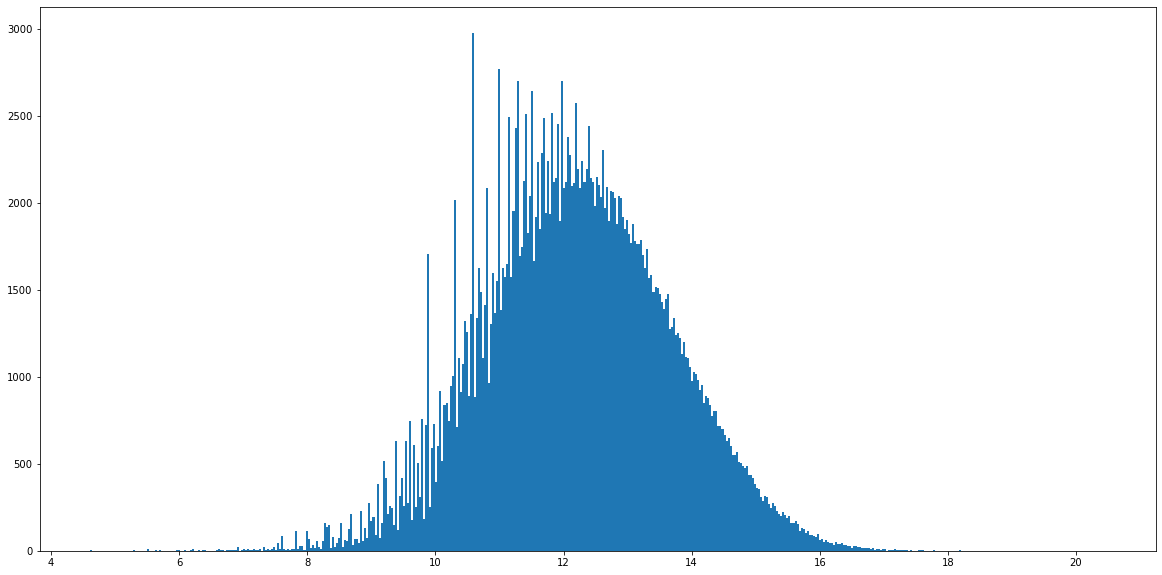

In [24]:
# 좀 더 정규분포에 가까워진 것을 확인할 수 있다.
plt.figure(figsize = (20, 10))
plt.hist(df_clnt_buy_sum, bins = 500)
plt.show()

# 2. Categorical features
문자형 변수, 범주형 변수는 전부 숫자로 바꿔주어야 한다.

바꿔주는 방식은 매우 많지만, 오늘은 가장 간단한 one-hot encoding을 배운다.

## 2.1. one-hot encoding

one-hot encoding은 표현하고 싶은 단어에 1의 값을 부여하고, 다른 단어에는 0을 부여하는 단어의 벡터 표현 방식이다.

In [25]:
# 위에서 만들었던 변수 f는 categorical feature였다.
f

CLNT_ID
0         1
1         7
2         8
3         5
4         3
         ..
263099    9
263100    2
263101    3
263102    8
263103    9
Name: TOT_PAG_VIEW_CT, Length: 263104, dtype: int64

In [26]:
# 이를 one-hot encoding해주자.
oh_f = pd.get_dummies(f) ; oh_f

,0,1,2,3,4,5,6,7,8,9
CLNT_ID,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
263099,0,0,0,0,0,0,0,0,0,1
263100,0,0,1,0,0,0,0,0,0,0
263101,0,0,0,1,0,0,0,0,0,0


## 2.2. PCA

In [27]:
from sklearn.decomposition import PCA

max_col = oh_f.shape[1] # 차원축소하려는 데이터의 column의 개수
pca = PCA(n_components=max_col, random_state=0).fit(oh_f)

cumsum = np.cumsum(pca.explained_variance_ratio_) # 분산의 설명량을 누적합
num_col = np.argmax(cumsum >= 0.99) + 1 # 분산의 설명량이 99%이상 되는 차원의 수

# 차원축소
pca = PCA(n_components = num_col, random_state=0).fit_transform(oh_f)
pca_f = pd.DataFrame(pca)

In [28]:
# feature가 줄은 것을 확인할 수 있다.
pca_f

,0,1,2,3,4,5,6,7,8
0,-0.133956,-0.280294,0.753143,0.464010,0.013946,-0.013279,-0.074167,-0.086422,-0.085255
1,-0.087426,-0.113470,-0.039128,-0.359578,0.786083,-0.211075,-0.231298,-0.146011,-0.106591
2,-0.084916,-0.107999,-0.035913,-0.312389,-0.211761,0.788603,-0.282177,-0.155113,-0.108911
3,-0.034357,-0.031116,-0.006891,-0.040435,-0.003206,0.003236,0.027466,0.070670,0.944453
4,-0.126778,-0.242384,-0.652598,0.613495,0.015573,-0.014750,-0.079944,-0.090345,-0.087110
...,...,...,...,...,...,...,...,...,...
263099,-0.086153,-0.110667,-0.037451,-0.334327,-0.579682,-0.576438,-0.254217,-0.150424,-0.107739
263100,-0.055199,-0.056724,-0.014135,-0.090269,-0.008538,0.008782,0.090312,0.918605,-0.183984
263101,-0.126778,-0.242384,-0.652598,0.613495,0.015573,-0.014750,-0.079944,-0.090345,-0.087110
263102,-0.084916,-0.107999,-0.035913,-0.312389,-0.211761,0.788603,-0.282177,-0.155113,-0.108911


- 차원축소는 말 그대로 불필요한 feature를 제거한다는 의미이다. 따라서, **categorical feature, sparse data**에만 사용해야 한다!

In [29]:
# function
def getPCA(df):
    max_col = df.shape[1]
    pca = PCA(n_components=max_col, random_state=0).fit(df)

    cumsum = np.cumsum(pca.explained_variance_ratio_) 
    num_col = np.argmax(cumsum >= 0.99) + 1 

    pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
    return pd.DataFrame(pca)   

# 3. Feature selection

피처가 모델의 성능에 얼마나 큰 영향을 미치는지 분석하고, 중요한 피처만 선택하는 기법.

In [30]:
!pip install eli5

In [31]:
# 간단한 merge
df = df.drop(['SESS_ID', 'PD_C', 'PD_ADD_NM', 'PD_BRA_NM', 'SESS_DT','DVC_CTG_NM','ZON_NM','CITY_NM', 'KWD_NM','PD_NM', 'CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM'], axis = 1).groupby('CLNT_ID').mean().reset_index()

In [32]:
my_df = pd.merge(df, target) ; my_df

,CLNT_ID,HITS_SEQ,PD_BUY_AM,SESS_SEQ,TOT_PAG_VIEW_CT,SEARCH_CNT,LABEL
0,0,63.000000,43250.000000,17.000000,59.000000,1.000000,F20
1,1,110.187500,79750.000000,8.375000,127.812500,1.437500,F30
2,2,234.181818,50000.000000,37.272727,264.181818,2.090909,F30
3,3,39.500000,106400.000000,1.000000,93.000000,1.500000,F20
4,4,23.666667,20866.666667,73.666667,56.666667,1.833333,F20
...,...,...,...,...,...,...,...
263099,263099,275.000000,8687.500000,5.000000,274.000000,1.142857,M30
263100,263100,78.500000,11200.000000,133.500000,104.000000,1.000000,F40
263101,263101,73.000000,33900.000000,2.000000,78.000000,1.500000,F40
263102,263102,155.000000,1080.000000,195.000000,188.000000,1.200000,F30


In [33]:
# make features, target
train_x = my_df.loc[:, 'HITS_SEQ':'SEARCH_CNT']
train_y = my_df[['LABEL']]

In [34]:
from sklearn.linear_model import LogisticRegression
from eli5.sklearn import PermutationImportance
import eli5

# meta_model 설정
meta = LogisticRegression(random_state=0)
perm = PermutationImportance(meta.fit(train_x, train_y['LABEL'])).fit(train_x, train_y['LABEL'])

In [35]:
# feature별 가중치 확인
eli5.show_weights(perm, 
                  feature_names = train_x.columns.tolist(), 
                  top=(30))

Weight,Feature
0.0234 ± 0.0003,SESS_SEQ
0.0191 ± 0.0013,TOT_PAG_VIEW_CT
0.0116 ± 0.0010,HITS_SEQ
0.0000 ± 0.0000,SEARCH_CNT
0.0000 ± 0.0001,PD_BUY_AM


In [36]:
# 각 feature별 가중치, 분산
perm_features_df = eli5.explain_weights_df(perm, feature_names = train_x.columns.tolist())
display(perm_features_df.head(10))
perm_features = perm_features_df.loc[perm_features_df['weight'] >= 0.001]['feature'].tolist()

,feature,weight,std
0,SESS_SEQ,0.023404,0.000174
1,TOT_PAG_VIEW_CT,0.019072,0.000652
2,HITS_SEQ,0.011639,0.000514
3,SEARCH_CNT,0.000007,0.000020
4,PD_BUY_AM,0.000005,0.000044


In [37]:
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = LogisticRegression(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []

# kfold
sscv = StratifiedKFold(n_splits = 5, random_state = 0)

# 최적의 feature 조합 찾기
for p in tqdm(range(90,100,1)): # 전체 feature의 90% ~ 100%개 사용한 model
    nf = int(perm_features_df.shape[0] * p * 0.01)
    features_selected = perm_features_df.iloc[:nf].feature
    X_new = train_x[features_selected]
    cv_score = cross_val_score(model, X_new, train_y['LABEL'], scoring='accuracy', cv=sscv).mean()
    cv_scores.append((p,cv_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:56<00:00, 59.64s/it]


(90, 0.4198681900550418)


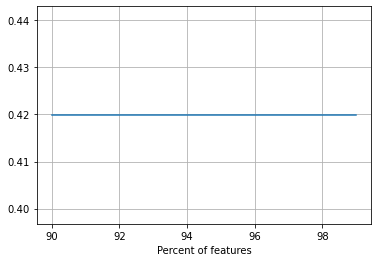

In [38]:
# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [39]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
nf = int(perm_features_df.shape[0] * best_score[0] * 0.01)
features_selected = perm_features_df.iloc[:nf].feature

In [40]:
# function
def FeatureSelection(df, target):
    meta = LogisticRegression(random_state=0)
    perm = PermutationImportance(meta.fit(df, target)).fit(df, target)
    
    perm_features_df = eli5.explain_weights_df(perm, feature_names = df.columns.tolist())
    perm_features = perm_features_df.loc[perm_features_df['weight'] >= 0.001]['feature'].tolist()
    
    model = LogisticRegression(random_state=0)
    cv_scores = []

    sscv = StratifiedKFold(n_splits = 5, random_state = 0)

    for p in tqdm(range(5,100,1)): 
        nf = int(perm_features_df.shape[0] * p * 0.01)
        features_selected = perm_features_df.iloc[:nf].feature
        X_new = df[features_selected]
        cv_score = cross_val_score(model, X_new, target, scoring='accuracy', cv=sscv).mean()
        cv_scores.append((p,cv_score))
        
    best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
    print(best_score)
    plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
    plt.xlabel('Percent of features')
    plt.grid()
    plt.show()
    
    nf = int(perm_features_df.shape[0] * best_score[0] * 0.01)
    return perm_features_df.iloc[:nf].feature

In [41]:
FeatureSelection(train_x, train_y['LABEL'])

 25%|██████████████████▋                                                       | 24/95 [18:57:16<56:04:25, 2843.18s/it]


KeyboardInterrupt: 